### Feature Engineering

Feature Engineering is a methodology to choose 
<br>better features for a given machine learning problem 
<br>via data mining techniques. 
<br>
<br>Techniques Include:
- Removing Junk (Columns and Rows)
- Imputation (Filling in Missing Data if Applicable)
- Handling Outliers
- Binning
- Log Transformation
- One-hot Encoding
- Grouping Operations
- Feature Split
- Scaling
- Extracting Date
- Feature Importance
- Extracting Synthetic Features From Text

In [1]:
import os, sys
import numpy as np
import pandas as pd
!python --version

Python 3.9.12


In [2]:
# Impute the mean/median of the feature for missing values
# Python code: 
df = pd.DataFrame({"aa":[1,2,np.nan,4,5,6]})
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[1. ],
       [2. ],
       [3.6],
       [4. ],
       [5. ],
       [6. ]])

In [3]:
# Imputation using (Most Frequent) 
# or (Zero/Constant) values
df = pd.DataFrame({"aa":[1,2,np.nan,4,5,6]})
df = df.fillna(0)
df

,aa
0,1.0
1,2.0
2,0.0
3,4.0
4,5.0
5,6.0


In [4]:
# Imputation - MICE
# Multivariate Imputation by Chained Equation (MICE): 
# Filling the missing data multiple times. 

# The chained equations approach is also very 
# flexible and can handle different variables 
# of different data types (i.e., continuous or binary) 
# as well as complexities such as bounds, 
# or survey skip patterns.

# Python code to implement MICE:
    
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]

# the model learns that the second feature 
# is double the first
print(np.round(imp.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


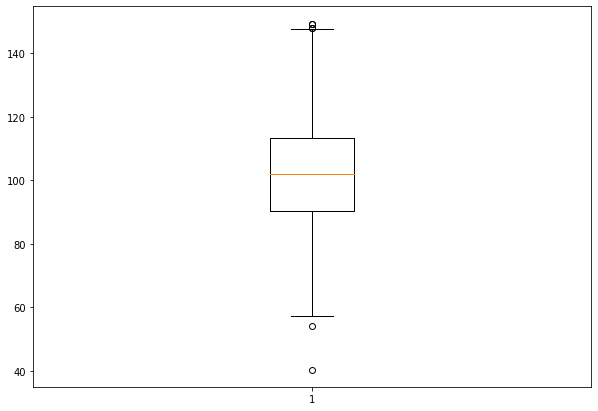

In [5]:
# Detect outliers
# data visualization, boxplots and scatterplots
# 
# https://towardsdatascience.com/practical-implementation-of-outlier-detection-in-python-90680453b3ce
#
# Create a boxplot in python:

import matplotlib.pyplot as plt 
import numpy as np 

np.random.seed(10) 
data = np.random.normal(100, 20, 200) 
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot(data) 
plt.show()

In [6]:
np.random.choice((-1, 1), 8)

array([ 1,  1, -1, -1,  1, -1,  1, -1])

In [7]:
# generate data with outliers
def generate( median=630, 
              err=12, 
              outlier_err=100, 
              size=80, 
              outlier_size=10 ):

    # create array of length "size" of random numbers [0..1)
    arr1 = np.random.rand(size)
    # create array of length "size" of 1/-1 numbers
    arr2 = np.random.choice((-1, 1), size)
    # make array of length "size" of points median +/ err
    data = median + err * arr1 * arr2
    # ----------------------------------------
    lower_errs = outlier_err * np.random.rand(outlier_size)
    upper_errs = outlier_err * np.random.rand(outlier_size)
    # outliers:
    out_low = median - err - lower_errs
    out_upp = median + err + upper_errs
    # ----------------------------------------
    data = np.concatenate((data, out_low, out_upp))
    np.random.shuffle(data)   # shuffle in place

    return data

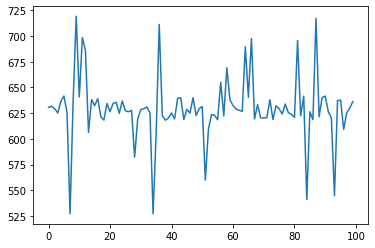

In [8]:
y = generate()
x = list(range(len(y)))
plt.plot(x,y)
plt.show()